## 1. Business Understanding

- Banking Dataset
- Direct Marketing Campaigns of Banking Institution
- Data for 2 years 45,211 rows orderred by date
- This dataset is publicly available for research
- By subscribing I am reffering to doing term deposits

## 2. Data Understanding

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, classification_report, fbeta_score

# Define seed for repeatability
SEED = 42
np.random.seed(SEED)

In [3]:
df = pd.read_csv('dataset.csv',sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


####  Evaluate quality of the data, are there any null values to clean?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Visualize data 

#### Univariate analysis of categorical features
* How many customers subscribe? 
* Looking into the customer's data (job, marital state, education, contact method

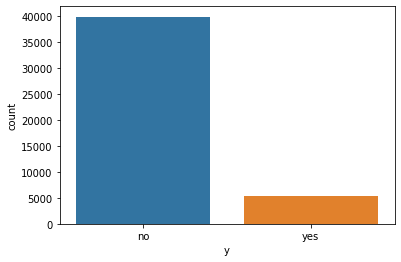

In [8]:
# How many people subscribe (a.k.a buy the bank's product, meaning doing term deposits.)
sns.countplot(x=df.y)
plt.show()

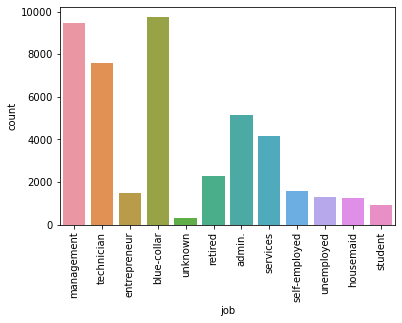

In [7]:
# Distribution of job feature

sns.countplot(x=df.job)
plt.xticks(rotation=90)
plt.show()

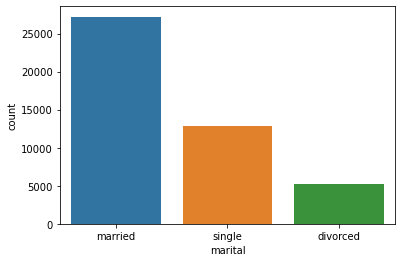

In [8]:
# Distribution of marital feature

sns.countplot(x=df.marital)
plt.show()

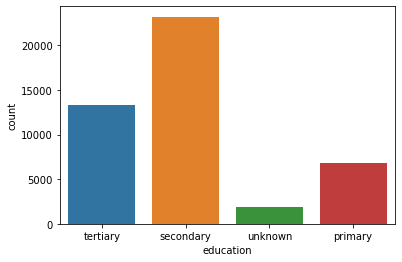

In [9]:
# Distribution of education feature

sns.countplot(x=df.education)
plt.show()

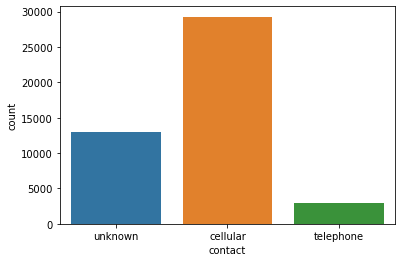

In [10]:
# Distribution of contact feature

sns.countplot(x=df.contact)
plt.show()

#### Bivariate analysis of Categorical features with target features.

#### Figuring out if there is any connection between age, balance, duration of campaign call with the outcome of the campaign. 

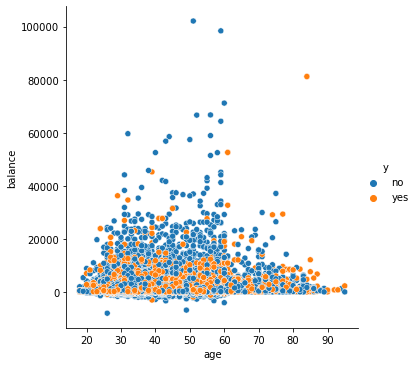

In [11]:
sns.relplot(x="age", y="balance", hue="y", data=df)

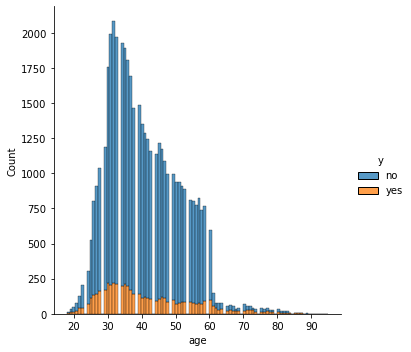

In [15]:
sns.displot(df, x="age", hue="y", multiple="stack")

#### The distribution plot above shows us that customers bellow 25 and above 60 are more likely to buy the product

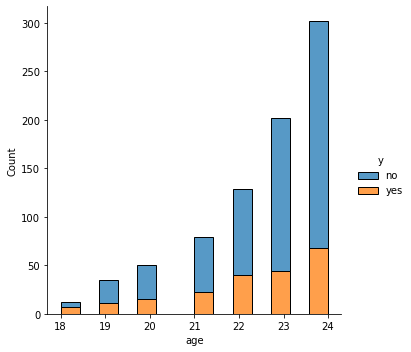

In [16]:
sns.displot(df[df['age'] < 25], x="age", hue="y", multiple="stack")

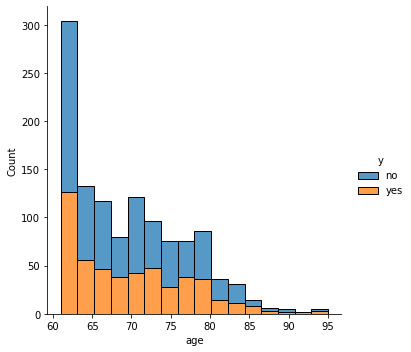

In [37]:
sns.displot(df[df['age'] > 60], x="age", hue="y", multiple="stack")

### What about the duration of a call during a campaign?

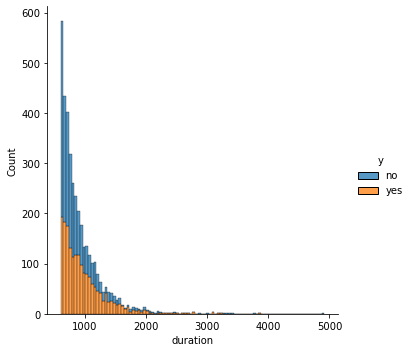

In [13]:
sns.displot(df[df['duration'] > 600], x='duration', hue='y', multiple='stack')

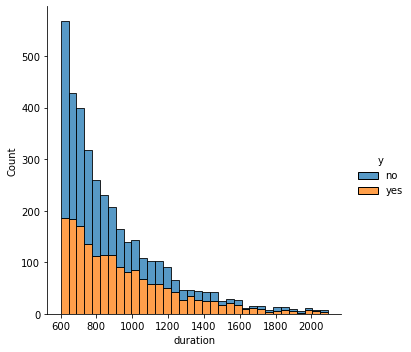

In [44]:
sns.displot(df[(df['duration'] > 600) & (df['duration'] < 2100)], x='duration', hue='y', multiple='stack')

#### Regarding the campaigns, the deciding factor seems to be perseverance. Here duration of communication is counted in seconds so between 10 to 30 minutes of communication the bank get's the most impressive results.

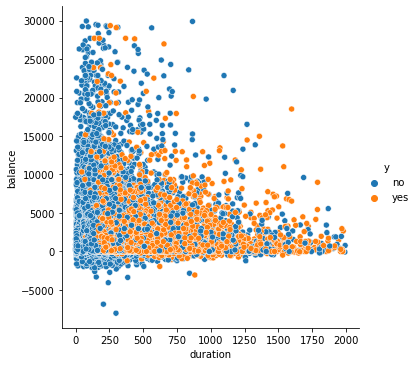

In [49]:
sns.relplot(x="duration",y='balance',hue="y", data=df[(df["balance"] < 30000) & (df['duration'] < 2000)]);

#### Customers with balance under 15k could be pursuaded with more campaign duration

#### What kind of jobs have the most potential to convert?

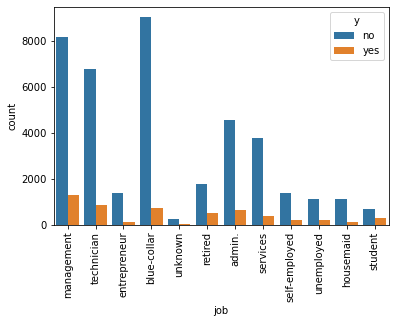

In [50]:
sns.countplot(x="job", hue="y", data=df)
plt.xticks(rotation=90)
plt.show()

In [35]:
convertingJobRatio = pd.DataFrame({'Job' : []})
for i in df['job'].unique():
    convertingJobRatio = convertingJobRatio.append(df[(df["job"] == i)]["y"].value_counts().to_frame().iloc[0] * 100 / df[(df["job"] == i)]["y"].value_counts().sum())
convertingJobRatio["Job"] = df["job"].unique()
convertingJobRatio.sort_values(by='y', ascending=True)

,Job,y
no,student,71.321962
no,retired,77.208481
no,unemployed,84.497314
no,management,86.244449
no,admin.,87.797331
no,self-employed,88.157061
no,unknown,88.194444
no,technician,88.943004
no,services,91.116996
no,housemaid,91.209677


#### Students and retired customers came first and second with an impressive over 20% chance of converting in a campaign

<AxesSubplot:xlabel='marital', ylabel='count'>

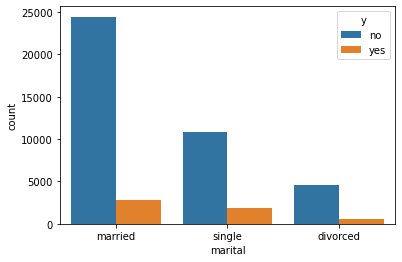

In [51]:
sns.countplot(x="marital", hue="y", data=df)

<AxesSubplot:xlabel='education', ylabel='count'>

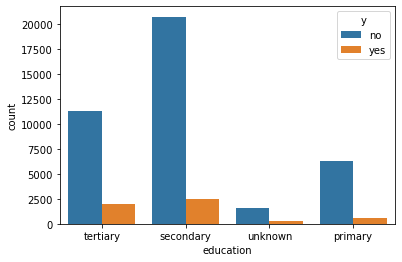

In [52]:
sns.countplot(x='education', hue='y', data=df)

<AxesSubplot:xlabel='contact', ylabel='count'>

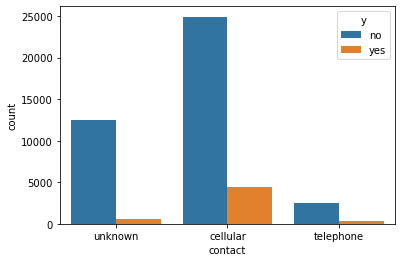

In [53]:
sns.countplot(x='contact', hue='y', data=df)

### Correlation

In [21]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


#### Based on all of the above the bank should narrow down:
* Job related: Students, retired customers, unemployed
* Campaigns: Customers are more likely to convert when the duration of the communication is between 10 to 30 minutes.
* Customers with balance under 15k
* Customers aging under 25 and over 60 are the ideal target.

## 3. Data Preparation

* One hot Encoding
* Unknown -> mode 

#### Filling unknown values

In [57]:
# job unknown values
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [58]:
# We can fill unknown job values with mode value but also we can fill unknown job values with mode of education degree per job.

In [59]:
educationRatio = pd.DataFrame({'Job' : []})
for i in df['job'].unique():
    educationRatio = educationRatio.append(df[(df["job"] == i)]["education"].value_counts().to_frame().iloc[0] * 100 / df[(df["job"] == i)]["education"].value_counts().sum())
educationRatio["Job"] = df["job"].unique()
educationRatio

,Job,education
tertiary,management,82.480440
secondary,technician,68.829801
tertiary,entrepreneur,46.133154
secondary,blue-collar,55.189067
unknown,unknown,44.097222
secondary,retired,43.462898
secondary,admin.,81.589635
secondary,services,83.220992
tertiary,self-employed,52.754908
secondary,unemployed,55.871067


In [60]:
df.loc[(df.job == "unknown") & (df.education == "secondary"),"job"] = "services"
df.loc[(df.job == "unknown") & (df.education == "primary"),"job"] = "housemaid"
df.loc[(df.job == "unknown") & (df.education == "tertiary"),"job"] = "management"
df.loc[(df.job == "unknown"),"job"] = "blue-collar"

In [61]:
df['job'].value_counts()

blue-collar      9859
management       9497
technician       7597
admin.           5171
services         4225
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1291
student           938
Name: job, dtype: int64

 #### Education Unknown Values

In [62]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [63]:
# Filling unknown values with educationRatio again

df.loc[(df.education == "unknown") & (df.job == "admin."),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "management"),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "services"),"education"] = "tertiary"
df.loc[(df.education == "unknown") & (df.job == "technician."),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "retired"),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "blue-collar"),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "housemaid."),"education"] = "primary"
df.loc[(df.education == "unknown") & (df.job == "self-employed"),"education"] = "tertiary"
df.loc[(df.education == "unknown") & (df.job == "student"),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "entrepreneur"),"education"] = "tertiary"
df.loc[(df.education == "unknown") & (df.job == "unemployed"),"education"] = "secondary"

#REST CAN BE SECONDARY
df.loc[(df.education == "unknown"),"education"] = "secondary"

In [64]:
df['education'].value_counts()

secondary    24794
tertiary     13566
primary       6851
Name: education, dtype: int64

In [65]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [66]:
# I will replace unknown values with mode value for contact

df['contact'].replace(['unknown'],df['contact'].mode(), inplace=True)

In [67]:
df['contact'].value_counts()

cellular     42305
telephone     2906
Name: contact, dtype: int64

##### Housing and loan looks good

In [68]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [69]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

### One hot encoding

#### In order to use our categorical columns, we have to transform them into numeric columns

In [70]:
#Job
ohe = OneHotEncoder(sparse = False)
df = pd.concat((df , pd.DataFrame(ohe.fit_transform(df["job"].to_frame()),columns = "job_" + np.sort(df["job"].unique()))),axis = 1)

# Marital State
df = pd.concat((df , pd.DataFrame(ohe.fit_transform(df["marital"].to_frame()),columns = "marital_" + np.sort(df["marital"].unique()))),axis = 1)
df.drop(columns = ["marital"],inplace = True)

# Education
df.loc[(df.education == 'primary'), 'education'] = 1
df.loc[(df.education == 'secondary'), 'education'] = 2
df.loc[(df.education == 'tertiary'), 'education'] = 3

# Default
df.loc[(df.default == 'yes'), 'default'] = 1
df.loc[(df.default == 'no'), 'default'] = 0

# Housing
df.loc[(df.housing == 'yes'),'housing'] = 1
df.loc[(df.housing == 'no') ,'housing'] = 0

# Loan
df.loc[(df.loan == 'yes'), 'loan'] = 1
df.loc[(df.loan == 'no'), 'loan'] = 0

# Contact
df.loc[(df.contact == 'telephone'), 'contact'] = 1
df.loc[(df.contact == 'cellular'), 'contact'] = 0

# Y
df.loc[(df.y == 'yes'), 'y'] = 1
df.loc[(df.y == 'no'), 'y'] = 0


In [71]:
df.head()

,age,job,education,default,balance,housing,loan,contact,day,month,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,58,management,3,0,2143,1,0,0,5,may,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,44,technician,2,0,29,1,0,0,5,may,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33,entrepreneur,2,0,2,1,1,0,5,may,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,47,blue-collar,2,0,1506,1,0,0,5,may,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,33,blue-collar,2,0,1,0,0,0,5,may,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [72]:
df.balance.sort_values()

12909     -8019
15682     -6847
38736     -4057
7413      -3372
1896      -3313
          ...  
41693     71188
42558     81204
43393     81204
26227     98417
39989    102127
Name: balance, Length: 45211, dtype: int64

In [73]:
df.loc[(df.balance > 66721),"balance"] = 66721
#Lets scale balance column.
df["balance"]= df["balance"] / 66721

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  int64  
 1   job                45211 non-null  object 
 2   education          45211 non-null  object 
 3   default            45211 non-null  object 
 4   balance            45211 non-null  float64
 5   housing            45211 non-null  object 
 6   loan               45211 non-null  object 
 7   contact            45211 non-null  object 
 8   day                45211 non-null  int64  
 9   month              45211 non-null  object 
 10  duration           45211 non-null  int64  
 11  campaign           45211 non-null  int64  
 12  pdays              45211 non-null  int64  
 13  previous           45211 non-null  int64  
 14  poutcome           45211 non-null  object 
 15  y                  45211 non-null  object 
 16  job_admin.         452

In [75]:
# Before training we should transform object dtypes to int beacause some classifiers won't work with object dtype
# Auta exoun meinei pou den ginontai

df.education = df.education.astype(int)
df.default = df.default.astype(int)
df.housing = df.housing.astype(int)
df.loan = df.loan.astype(int)
df.contact = df.contact.astype(int)
df.y = df.y.astype(int)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  int64  
 1   job                45211 non-null  object 
 2   education          45211 non-null  int32  
 3   default            45211 non-null  int32  
 4   balance            45211 non-null  float64
 5   housing            45211 non-null  int32  
 6   loan               45211 non-null  int32  
 7   contact            45211 non-null  int32  
 8   day                45211 non-null  int64  
 9   month              45211 non-null  object 
 10  duration           45211 non-null  int64  
 11  campaign           45211 non-null  int64  
 12  pdays              45211 non-null  int64  
 13  previous           45211 non-null  int64  
 14  poutcome           45211 non-null  object 
 15  y                  45211 non-null  int32  
 16  job_admin.         452

<AxesSubplot:>

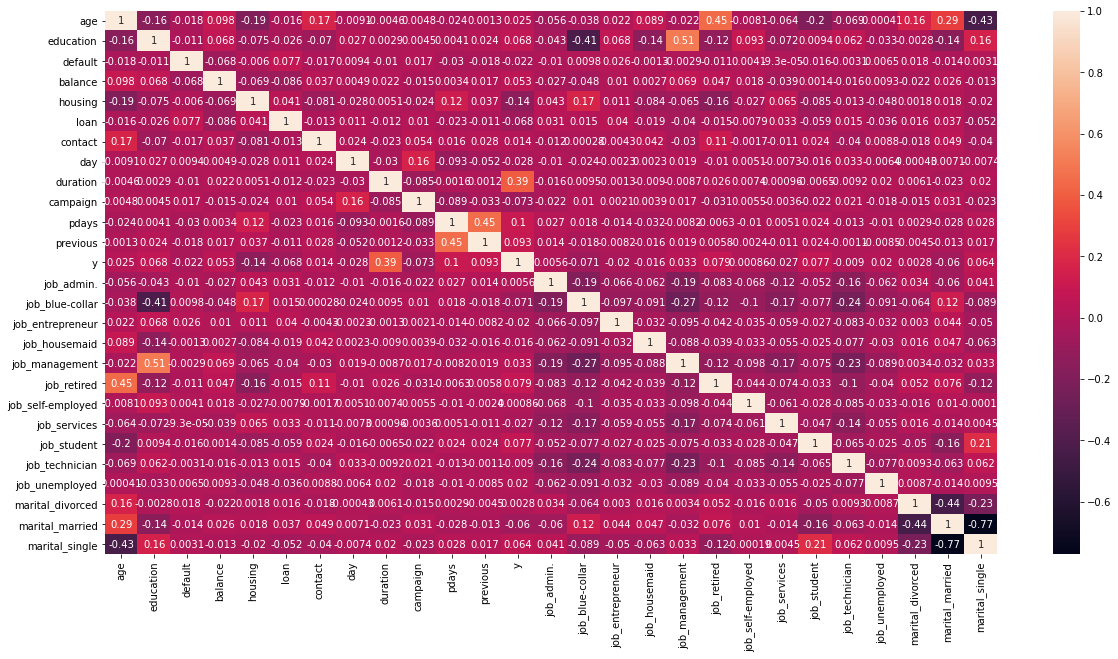

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True)

Not so much correlation between y and the other features.. The most correlation is between y and duration of the call. 

## 4. Modeling

In [88]:
y = df.y.values
X = df.drop(columns = ["job","month","default","poutcome","y"])
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.25, random_state = 10)

In [89]:
X_train.head()

,age,education,balance,housing,loan,contact,day,duration,campaign,pdays,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
27660,37,2,0.046627,1,0,0,21,9,3,185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
40479,23,2,0.013039,0,0,0,6,316,4,-1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12770,28,3,0.000000,0,0,0,7,94,1,-1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25501,43,1,0.031834,1,0,0,19,104,1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7537,55,2,0.007059,1,0,0,30,58,2,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [99]:
X_train['education'].value_counts(normalize=True)

2    0.547393
3    0.300902
1    0.151705
Name: education, dtype: float64

### Decision Tree Classifier

In [100]:
# Define the model
dc = DecisionTreeClassifier(max_depth=30, min_samples_split=10, min_samples_leaf=10,
                            random_state=SEED, class_weight="balanced")

In [101]:
# Define a scorer
rs = make_scorer(recall_score)

# Cross validation
cv = cross_val_score(dc, X_train, y_train, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv))
print("%0.2f recall with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

Cross validation scores: [0.77889447 0.71356784 0.7160804  0.75125628 0.68341709 0.75376884
 0.68341709 0.70351759 0.74055416 0.73299748]
0.73 recall with a standard deviation of 0.03


In [102]:
# Fit the model on the complete train dataset
dc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [103]:
# Get predictions from the train dataset
pred = dc.predict(X_train)
print("The train recall score is {}".format(np.round(recall_score(y_train, pred), 2)))

The train recall score is 0.95


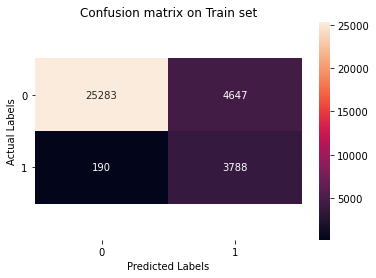

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     29930
           1       0.45      0.95      0.61      3978

    accuracy                           0.86     33908
   macro avg       0.72      0.90      0.76     33908
weighted avg       0.93      0.86      0.88     33908



In [104]:
plt.title("Confusion matrix on Train set")
ax = sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_train, pred))

In [105]:
# Get predictions from the test dataset
pred = dc.predict(X_test)
print("The test recall score is {}".format(np.round(recall_score(y_test, pred), 2)))

The test recall score is 0.72


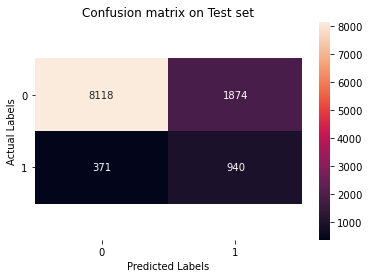

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      9992
           1       0.33      0.72      0.46      1311

    accuracy                           0.80     11303
   macro avg       0.65      0.76      0.67     11303
weighted avg       0.88      0.80      0.83     11303



In [106]:
plt.title("Confusion matrix on Test set")
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, pred))

### Random Forest Classifier

Cross validation scores: [0.28643216 0.23869347 0.25879397 0.28140704 0.25376884 0.2839196
 0.25125628 0.25628141 0.2720403  0.29722922]
0.27 recall with a standard deviation of 0.02
The train recall score is 1.0


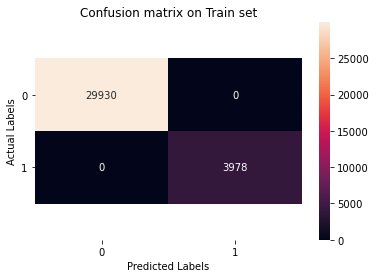

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29930
           1       1.00      1.00      1.00      3978

    accuracy                           1.00     33908
   macro avg       1.00      1.00      1.00     33908
weighted avg       1.00      1.00      1.00     33908

The test recall score is 0.27


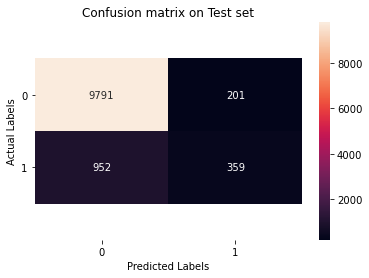

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9992
           1       0.64      0.27      0.38      1311

    accuracy                           0.90     11303
   macro avg       0.78      0.63      0.66     11303
weighted avg       0.88      0.90      0.88     11303



In [107]:
rf = RandomForestClassifier(n_jobs=-1, random_state=SEED, class_weight="balanced_subsample")

# Define a scorer
rs = make_scorer(recall_score)

# Cross validation
cv = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv))
print("%0.2f recall with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

# Fit the model on the complete train dataset
rf.fit(X_train, y_train)

# Get predictions from the train dataset
pred = rf.predict(X_train)
print("The train recall score is {}".format(np.round(recall_score(y_train, pred), 2)))

plt.title("Confusion matrix on Train set")
ax = sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_train, pred))

# Get predictions from the test dataset
pred = rf.predict(X_test)
print("The test recall score is {}".format(np.round(recall_score(y_test, pred), 2)))

plt.title("Confusion matrix on Test set")
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, pred))

## 5. Evaluation

In [61]:
# The train recall score is good, but the test recall score is not so much. 


It’s common to look at the combination of precision and recall. 

Precision measures how
accurate our positive predictions were:

def precision(tp, fp, fn, tn):
return tp / (tp + fp)

print precision(70, 4930, 13930, 981070) # 0.014

And recall measures what fraction of the positives our model identified:

def recall(tp, fp, fn, tn):
return tp / (tp + fn)

print recall(70, 4930, 13930, 981070) # 0.005

These are both terrible numbers, reflecting that this is a terrible model.

Sometimes precision and recall are combined into the F1 score, which is defined as:

def f1_score(tp, fp, fn, tn):
p = precision(tp, fp, fn, tn)
r = recall(tp, fp, fn, tn)
return 2 * p * r / (p + r)

This is the harmonic mean of precision and recall and necessarily lies between them.
Usually the choice of a model involves a trade-off between precision and recall. 
A model that predicts “yes” when it’s even a little bit confident will probably have a high recall but a low precision; a model that predicts “yes” only when it’s extremely confident is likely to have a low recall and a high precision.

Alternatively, you can think of this as a trade-off between false positives and false
negatives. Saying “yes” too often will give you lots of false positives; saying “no” too
often will give you lots of false negatives.

## 6. Deployment

Key Steps for Project
Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset. **Done**

2) Pose at least three questions related to business or real-world applications of how the data could be used. **DONE**

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

Prepare data: **Done**

Gather necessary data to answer your questions**Done**
Handle categorical and missing data**Done**
Provide insight into the methods you chose and why you chose them**Done**
Analyze, Model, and Visualize**Done**

Provide a clear connection between your business questions and how the data answers them.
4) Communicate your business insights:

Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind **done**
Create a blog post to share your questions and insights with a non-technical audience
Your deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!

Created git for the project
To do: 
* Update README **DONE**
* Ask the questions and give answers with visual **done**
* Did the modeling, nice classifier BUT gain knowledge on: recall(test and train) **done** 
* Begin medium blog **done**
* EDA find correlation between age and subscribed or not, one good graph visualizing. **done**
* Now that I mentioned graphs, make a couple of nice graphs for the medium blog as well  
* Fine tune model
* Make the notebook cleaner **done**
* Finish medium blog